# Association Rule Assignment | Market Basket Analysis Dataset

## Import Libraries

In [26]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## Load the Dataset

In [27]:
df = pd.read_csv(r"C:\Ozy\Data Science\DS datasets\basket_analysis.csv")
df.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Basic Information of Dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    999 non-null    int64
 1   Apple         999 non-null    bool 
 2   Bread         999 non-null    bool 
 3   Butter        999 non-null    bool 
 4   Cheese        999 non-null    bool 
 5   Corn          999 non-null    bool 
 6   Dill          999 non-null    bool 
 7   Eggs          999 non-null    bool 
 8   Ice cream     999 non-null    bool 
 9   Kidney Beans  999 non-null    bool 
 10  Milk          999 non-null    bool 
 11  Nutmeg        999 non-null    bool 
 12  Onion         999 non-null    bool 
 13  Sugar         999 non-null    bool 
 14  Unicorn       999 non-null    bool 
 15  Yogurt        999 non-null    bool 
 16  chocolate     999 non-null    bool 
dtypes: bool(16), int64(1)
memory usage: 23.5 KB


## Checking Missing values in DataFrame

In [29]:
df.isnull().sum()

Unnamed: 0      0
Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64

## Remove duplicates in DataFrame

In [30]:
df.drop_duplicates(inplace=True)

## Generate frequent itemsets

In [31]:
frequent_itemsets = apriori(df.iloc[:, 1:], min_support=0.1, use_colnames=True)
frequent_itemsets 

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
164,0.101101,"(Nutmeg, chocolate, Ice cream)"
165,0.101101,"(Onion, chocolate, Ice cream)"
166,0.100100,"(Nutmeg, Kidney Beans, Milk)"
167,0.101101,"(Nutmeg, Kidney Beans, Yogurt)"


## Generate association rules

In [32]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482,0.071524
1,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610,0.071407
2,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
3,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289,0.247602
4,(Apple),(Cheese),0.383383,0.404404,0.162162,0.422977,1.045925,0.007120,1.032186,0.071208
...,...,...,...,...,...,...,...,...,...,...
431,"(chocolate, Yogurt)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444,0.284572
432,"(Milk, Yogurt)",(chocolate),0.190190,0.421421,0.104104,0.547368,1.298862,0.023954,1.278255,0.284135
433,(chocolate),"(Milk, Yogurt)",0.421421,0.190190,0.104104,0.247031,1.298862,0.023954,1.075489,0.397691
434,(Milk),"(chocolate, Yogurt)",0.405405,0.198198,0.104104,0.256790,1.295623,0.023753,1.078836,0.383741


## Histogram for support vs confidence

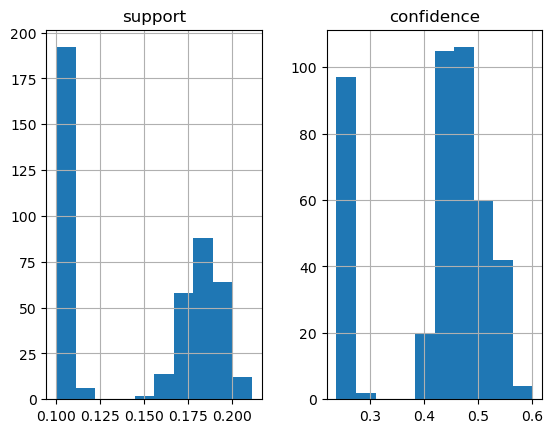

In [33]:
rules[['support', 'confidence']].hist()
plt.show()

## Scatter plot for support vs confidence

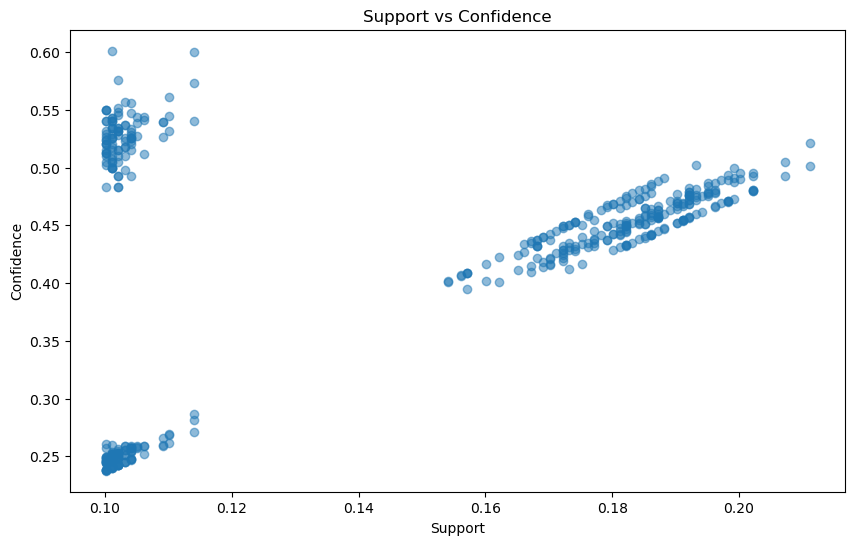

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

## Metrics and Visualizations

Histogram:
- Support Histogram: Shows the frequency distribution of the support values for the association rules which is around 200
- Confidence Histogram: Shows the frequency distribution of the confidence values for the association rules which is above 100

Support vs Confidence Scatter Plot:
- The scatter plot shows the relationship between support and confidence, highlighting rules with strong and reliable patterns.

## Key Findings:

- Identified frequent itemsets and strong association rules that can inform product placement strategies.
- Visualizations provided clear insights into the distribution of support and confidence metrics, aiding in understanding rule reliability.
- The support values indicate how frequently itemsets occur together, with a noticeable distribution across different levels.
- Confidence values demonstrate the strength of the relationships between antecedents and consequents in the rules.

## Effectiveness

- The association rule mining analysis on the Market Basket Analysis dataset provided valuable insights into customer purchasing behavior. By leveraging strong association rules, businesses can optimize strategies to enhance customer experience and increase sales effectively.